In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("aug_train.csv")
df1.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [3]:
df1.groupby('city')['city'].agg('count')

city
city_1       26
city_10      86
city_100    275
city_101     75
city_102    304
           ... 
city_93      26
city_94      26
city_97     104
city_98      79
city_99      94
Name: city, Length: 123, dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [5]:
df1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [6]:
(df1.gender == 'Male').sum()

13221

In [7]:
df1.enrolled_university.unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [8]:
(df1.enrolled_university == 'no_enrollment').sum()

13817

In [9]:
df1.education_level.unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [10]:
(df1.education_level == 'Graduate').sum()

11598

In [11]:
df1.major_discipline.unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [12]:
(df1.major_discipline == 'STEM').sum()

14492

In [13]:
df1.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20', nan],
      dtype=object)

In [14]:
df1.company_size.unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [15]:
(df1.company_size == '50-99').sum()

3083

In [16]:
df1.company_type.unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [17]:
(df1.company_type == 'Pvt Ltd').sum()

9817

In [18]:
df1.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [19]:
(df1.last_new_job == '1').sum()

8040

In [20]:
na_values = {'gender':'Male',
         'enrolled_university':'no_enrollment',
         'education_level':'Graduate',
         'major_discipline':'STEM',
         'company_size':'50-99',
         'company_type':'Pvt Ltd',
         'last_new_job':'1'}
df1.fillna(value=na_values,inplace=True)
df1.isnull().sum()

enrollee_id                0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                65
company_size               0
company_type               0
last_new_job               0
training_hours             0
target                     0
dtype: int64

In [21]:
df2 = df1.dropna()
df2.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,city_115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [22]:
df2.city.unique()

array(['city_103', 'city_40', 'city_21', 'city_115', 'city_162',
       'city_176', 'city_160', 'city_46', 'city_61', 'city_114',
       'city_13', 'city_159', 'city_102', 'city_67', 'city_100',
       'city_16', 'city_71', 'city_104', 'city_64', 'city_101', 'city_83',
       'city_105', 'city_73', 'city_75', 'city_41', 'city_11', 'city_93',
       'city_90', 'city_36', 'city_20', 'city_57', 'city_152', 'city_19',
       'city_65', 'city_74', 'city_173', 'city_136', 'city_98', 'city_97',
       'city_50', 'city_138', 'city_82', 'city_157', 'city_89',
       'city_150', 'city_70', 'city_175', 'city_94', 'city_28', 'city_59',
       'city_165', 'city_145', 'city_142', 'city_26', 'city_12',
       'city_37', 'city_43', 'city_116', 'city_23', 'city_99', 'city_149',
       'city_10', 'city_45', 'city_80', 'city_128', 'city_158',
       'city_123', 'city_7', 'city_72', 'city_106', 'city_143', 'city_78',
       'city_109', 'city_24', 'city_134', 'city_48', 'city_144',
       'city_91', 'city_

In [23]:
df2.city = df2.city.apply(lambda x: int(x[5:]))
df2.head(11)

c:\python\python38\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
6,28806,160,0.920,Male,Has relevent experience,no_enrollment,High School,STEM,5,50-99,Funded Startup,1,24,0.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [24]:
df2.relevent_experience.unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [25]:
df2.enrolled_university.unique()

array(['no_enrollment', 'Full time course', 'Part time course'],
      dtype=object)

In [26]:
df2.education_level.unique()

array(['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'],
      dtype=object)

In [27]:
df2[df2.education_level == 'Primary School']

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
213,5573,160,0.920,Male,No relevent experience,no_enrollment,Primary School,STEM,4,50-99,Pvt Ltd,never,50,0.0
269,5142,16,0.910,Male,No relevent experience,no_enrollment,Primary School,STEM,5,50-99,Pvt Ltd,never,15,0.0
271,30912,83,0.923,Male,No relevent experience,no_enrollment,Primary School,STEM,1,50-99,Pvt Ltd,never,103,0.0
315,25459,114,0.926,Male,No relevent experience,no_enrollment,Primary School,STEM,3,50-99,Pvt Ltd,never,16,0.0
316,23657,103,0.920,Male,No relevent experience,no_enrollment,Primary School,STEM,4,50-99,Pvt Ltd,never,14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,20469,97,0.925,Male,Has relevent experience,no_enrollment,Primary School,STEM,5,50-99,Pvt Ltd,>4,28,0.0
19027,17388,173,0.878,Male,No relevent experience,no_enrollment,Primary School,STEM,6,50-99,Pvt Ltd,never,106,0.0
19115,6953,61,0.913,Male,Has relevent experience,no_enrollment,Primary School,STEM,18,50-99,Pvt Ltd,2,54,0.0
19140,11398,103,0.920,Male,No relevent experience,no_enrollment,Primary School,STEM,2,50-99,Pvt Ltd,never,15,0.0


In [28]:
df2 = df2[df2['education_level'] != 'Primary School']
df3 = df2[df2['education_level'] != 'High School']
df3.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,50-99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,<1,50-99,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,50-99,Pvt Ltd,1,24,1.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0
11,23853,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,5000-9999,Pvt Ltd,1,108,0.0


In [29]:
df3.shape

(16773, 14)

In [30]:
df3.major_discipline.unique()

array(['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [31]:


df3[df3.major_discipline == 'No Major'].count()

enrollee_id               223
city                      223
city_development_index    223
gender                    223
relevent_experience       223
enrolled_university       223
education_level           223
major_discipline          223
experience                223
company_size              223
company_type              223
last_new_job              223
training_hours            223
target                    223
dtype: int64

In [32]:
major_stats = df3.groupby('major_discipline')['major_discipline'].agg('count').sort_values(ascending=False)
major_stats

major_discipline
STEM               14927
Humanities           668
Other                377
Business Degree      326
Arts                 252
No Major             223
Name: major_discipline, dtype: int64

In [33]:
df3.experience.unique()

array(['>20', '15', '5', '<1', '11', '13', '7', '17', '2', '16', '1', '4',
       '10', '14', '18', '19', '12', '3', '6', '9', '8', '20'],
      dtype=object)

In [34]:
def remove_symbols(x):
    if x[0] == '>':
        return int(x[1:])+1
    elif x[0] == '<':
        return int(x[1:])-1
    else:
        return int(x)

In [35]:
df3.experience = df3.experience.apply(remove_symbols)
df3.experience

c:\python\python38\lib\site-packages\pandas\core\generic.py:5159: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0        21
1        15
2         5
3         0
4        21
         ..
19151     2
19152     7
19153    14
19154    14
19155    21
Name: experience, Length: 16773, dtype: int64

In [36]:
df3.experience.unique()

array([21, 15,  5,  0, 11, 13,  7, 17,  2, 16,  1,  4, 10, 14, 18, 19, 12,
        3,  6,  9,  8, 20], dtype=int64)

In [37]:
df3.company_size.unique()

array(['50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [38]:
def tokens_symbols(a):
    tok1 = a.split('-')
    tok2 = a.split('/')
    if len(tok1) == 2:
        return int(int(tok1[0])+(int(tok1[1]))/2)
    elif len(tok2) == 2:
        return int(int(tok2[0])+(int(tok2[1]))/2)
    elif a[0] == '<':
        return int(a[1:])-1
    elif a[-1] == '+':
        return int(a[:-1])+1

In [39]:
df4 = df3.copy()
df4['company_size'] = df4['company_size'].apply(tokens_symbols)

In [40]:
df4.company_size = df4.company_size.apply(lambda x: int(x))

In [41]:
df4.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,>4,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,99,Pvt Ltd,never,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,99,Pvt Ltd,never,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,99,Pvt Ltd,1,24,1.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,>4,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,99,Pvt Ltd,1,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10001,Pvt Ltd,>4,123,0.0
11,23853,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,9999,Pvt Ltd,1,108,0.0


In [42]:
df4.company_size.unique()

array([   99,     9, 10001,  9999,  3499,    34,   350,   999],
      dtype=int64)

In [43]:
df4.company_type.unique()

array(['Pvt Ltd', 'Funded Startup', 'Early Stage Startup',
       'Public Sector', 'NGO', 'Other'], dtype=object)

In [44]:
df4.last_new_job.unique()

array(['1', '>4', 'never', '4', '3', '2'], dtype=object)

In [45]:
df4.last_new_job = df4.last_new_job.apply(lambda x: int(x[1:])+1 if x[0] == '>' else x)
df4.last_new_job = df4.last_new_job.apply(lambda x: 0 if x == 'never' else x)
df4.last_new_job = df4.last_new_job.apply(lambda x: int(x))
df4.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,5,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,99,Pvt Ltd,0,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,99,Pvt Ltd,0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,99,Pvt Ltd,1,24,1.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,5,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,99,Pvt Ltd,1,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10001,Pvt Ltd,5,123,0.0
11,23853,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,9999,Pvt Ltd,1,108,0.0


In [46]:
df4.last_new_job.unique()

array([1, 5, 0, 4, 3, 2], dtype=int64)

In [47]:
df4.training_hours.unique()

array([ 36,  47,  83,  52,   8,  24,  18,  46, 123, 108,  23, 106,   7,
       132,  68,  50,  48,  65,  13, 148,  72,  40, 141,  82, 145, 206,
        42,  14, 112,  26,  87,  20,  21,  92, 102,  45,  19,  32,  90,
        25,  15, 142,  28, 228,  22,  29,  12,  17,  35,   4, 136,  27,
        74,  86, 332, 140, 172,  33,  34, 150, 160,   3,   2, 210, 101,
        59, 260, 131, 109,  70,  51,  60, 164, 290, 133,  76, 156, 120,
       100,  55,  49,   6, 125, 326, 198,  11,  41, 114, 246,  81,  31,
        84, 105, 152,  38, 178,  39, 104, 202,  88, 218,  62,  10,  80,
        77,  37, 162, 190,   5,  44, 110, 107, 134,  30,  96,  57, 240,
        16,  94, 113,  56,  64, 320,   9, 129, 166,  95,  97, 204, 116,
       161,  75, 302,  53, 143, 182,  58, 124, 214, 288,  98,  54, 322,
        67,  61, 130, 220,  78, 314, 146,  43, 226,  91, 234, 163, 151,
        85, 168, 144,  66, 128,  73, 122, 154, 292, 188, 103,  71, 135,
       138, 184,  89, 118, 127, 216, 139, 196,  99, 256, 276, 12

In [48]:
df4.training_hours.apply(lambda x: int(x))
df4.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,5,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,99,Pvt Ltd,0,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,99,Pvt Ltd,0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0.0


In [49]:
df4.target.apply(lambda x: int(x))
df = df4.copy()
df.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,5,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,99,Pvt Ltd,0,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,99,Pvt Ltd,0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0.0
5,21651,176,0.764,Male,Has relevent experience,Part time course,Graduate,STEM,11,99,Pvt Ltd,1,24,1.0
7,402,46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,9,Pvt Ltd,5,18,1.0
8,27107,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,99,Pvt Ltd,1,46,1.0
9,699,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,17,10001,Pvt Ltd,5,123,0.0
11,23853,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5,9999,Pvt Ltd,1,108,0.0


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [51]:
df_label_encoder = df4
df_label_encoder['gender'] = label_encoder.fit_transform(df_label_encoder['gender'])
df_label_encoder['relevent_experience'] = label_encoder.fit_transform(df_label_encoder['relevent_experience'])
df_label_encoder['enrolled_university'] = label_encoder.fit_transform(df_label_encoder['enrolled_university'])
df_label_encoder['education_level'] = label_encoder.fit_transform(df_label_encoder['education_level'])
df_label_encoder['major_discipline'] = label_encoder.fit_transform(df_label_encoder['major_discipline'])
df_label_encoder['company_type'] = label_encoder.fit_transform(df_label_encoder['company_type'])

df_label_encoder.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,1,0,2,0,5,21,99,5,1,36,1.0
1,29725,40,0.776,1,1,2,0,5,15,99,5,5,47,0.0
2,11561,21,0.624,1,1,0,0,5,5,99,5,0,83,0.0
3,33241,115,0.789,1,1,2,0,1,0,99,5,0,52,1.0
4,666,162,0.767,1,0,2,1,5,21,99,1,4,8,0.0


In [52]:
df_label_encoder.drop(['enrollee_id','city','training_hours'],axis=1,inplace=True)
df_label_encoder.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,0.920,1,0,2,0,5,21,99,5,1,1.0
1,0.776,1,1,2,0,5,15,99,5,5,0.0
2,0.624,1,1,0,0,5,5,99,5,0,0.0
3,0.789,1,1,2,0,1,0,99,5,0,1.0
4,0.767,1,0,2,1,5,21,99,1,4,0.0


In [53]:
X = df_label_encoder.drop('target', axis=1)
X

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
0,0.920,1,0,2,0,5,21,99,5,1
1,0.776,1,1,2,0,5,15,99,5,5
2,0.624,1,1,0,0,5,5,99,5,0
3,0.789,1,1,2,0,1,0,99,5,0
4,0.767,1,0,2,1,5,21,99,1,4
...,...,...,...,...,...,...,...,...,...,...
19151,0.689,1,1,0,0,5,2,99,5,1
19152,0.920,0,0,2,0,2,7,34,1,1
19153,0.878,1,1,2,0,2,14,99,5,1
19154,0.920,1,0,2,0,5,14,99,5,4


In [54]:
y = df_label_encoder['target']
y

0        1.0
1        0.0
2        0.0
3        1.0
4        0.0
        ... 
19151    0.0
19152    0.0
19153    1.0
19154    1.0
19155    0.0
Name: target, Length: 16773, dtype: float64

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [57]:
len(X_train)

13418

In [58]:
len(X_test)

3355

In [59]:
model = LogisticRegression()

In [60]:
model.fit(X_train,y_train)

c:\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
model.score(X_test,y_test)

0.7496274217585693

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.15936304, 0.15192723, 0.14236639, 0.14489394, 0.15677301])

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

def find_best_model(X,y):
    algos = {
        'logistic_regression' : {
            'model' : LogisticRegression(),
            'params' : {
                'solver' : ['liblinear', 'sag', 'saga']
            }
        },
        'random_forest' : {
            'model' : RandomForestClassifier(),
            'params' : {
                'criterion' : ['gini', 'entropy'],
                'n_estimators' : [10, 100]
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    return pd.DataFrame(scores, columns=['model','best_score', 'best_params'])
# find_best_model(X,y)

In [64]:
model_RFC = RandomForestClassifier(random_state=0,max_depth= 10, max_features= 5,min_samples_leaf= 30, min_samples_split= 100, n_estimators= 70)

In [65]:
model_RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=30,
                       min_samples_split=100, n_estimators=70, random_state=0)

In [66]:
model_RFC.score(X_test,y_test)

0.7704918032786885

In [67]:
model_DT = DecisionTreeClassifier(criterion='gini',max_features=10, max_depth=10, min_samples_leaf=15, min_samples_split=150,random_state=0)

In [68]:
model_DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, max_features=10, min_samples_leaf=15,
                       min_samples_split=150, random_state=0)

In [69]:
model_DT.score(X_test,y_test)

0.7651266766020864

In [70]:
df4.head()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
0,0.920,1,0,2,0,5,21,99,5,1,1.0
1,0.776,1,1,2,0,5,15,99,5,5,0.0
2,0.624,1,1,0,0,5,5,99,5,0,0.0
3,0.789,1,1,2,0,1,0,99,5,0,1.0
4,0.767,1,0,2,1,5,21,99,1,4,0.0


In [92]:
model_RFC.predict([[0.920,1,0,2,0,5,21,99,5,1]])

array([0.])

In [93]:
model_RFC.predict([[0.776,1,1,2,0,5,15,99,5,5]])

array([0.])

In [95]:
model_RFC.predict([[0.624,1,1,0,0,5,5,99,5,5]])

array([1.])

In [73]:
# model_RFC.predict([[0,0,0.92,0,0,0,0,0,0,0,0,0,0]])

In [74]:
y_test

16314    0.0
14675    0.0
2407     1.0
4689     0.0
17964    1.0
        ... 
7226     0.0
1060     0.0
2147     0.0
8565     0.0
12501    0.0
Name: target, Length: 3355, dtype: float64

In [75]:
y_pred = model_RFC.predict(X_test)

In [76]:
df_label_encoder.corr()

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,target
city_development_index,1.000000,-0.025932,-0.056278,0.168188,0.074882,-0.124870,0.358550,0.073756,-0.009060,0.194941,-0.343646
gender,-0.025932,1.000000,-0.012088,-0.022485,-0.036481,0.062951,0.043332,-0.005750,0.032755,0.010428,-0.002027
relevent_experience,-0.056278,-0.012088,1.000000,-0.356138,-0.028301,-0.048003,-0.272798,-0.075344,0.066249,-0.174216,0.156066
enrolled_university,0.168188,-0.022485,-0.356138,1.000000,0.096319,-0.085736,0.323133,0.090234,-0.023769,0.216859,-0.161231
education_level,0.074882,-0.036481,-0.028301,0.096319,1.000000,0.007393,0.193636,0.064828,-0.034908,0.092250,-0.075634
major_discipline,-0.124870,0.062951,-0.048003,-0.085736,0.007393,1.000000,-0.000009,0.026692,0.014770,-0.032991,0.020747
experience,0.358550,0.043332,-0.272798,0.323133,0.193636,-0.000009,1.000000,0.088606,0.033567,0.452288,-0.200852
company_size,0.073756,-0.005750,-0.075344,0.090234,0.064828,0.026692,0.088606,1.000000,0.123909,0.105834,-0.082430
company_type,-0.009060,0.032755,0.066249,-0.023769,-0.034908,0.014770,0.033567,0.123909,1.000000,0.070016,0.064184
last_new_job,0.194941,0.010428,-0.174216,0.216859,0.092250,-0.032991,0.452288,0.105834,0.070016,1.000000,-0.101291


In [77]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [78]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2219,  279],
       [ 491,  366]], dtype=int64)

<AxesSubplot:>

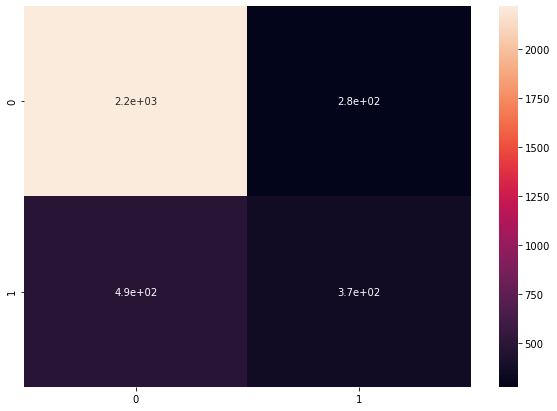

In [79]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [80]:
import pickle

In [81]:
with open('hr_analytics.pickle','wb') as f:
    pickle.dump(model,f)

In [82]:
import json

In [83]:
df4 = df4.drop('experience', axis=1)
df4.columns

Index(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'company_size', 'company_type', 'last_new_job', 'target'],
      dtype='object')

In [84]:
columns = df4.columns.values[:-1]
columns

array(['city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'company_size', 'company_type', 'last_new_job'], dtype=object)

In [85]:
hr_columns = {}
for col in columns:
    hr_columns.update({
        col : list(df[col].unique())
    })
hr_columns

{'city_development_index': [0.92,
  0.7759999999999999,
  0.624,
  0.789,
  0.767,
  0.764,
  0.762,
  0.913,
  0.926,
  0.8270000000000001,
  0.843,
  0.804,
  0.91,
  0.884,
  0.6659999999999999,
  0.5579999999999999,
  0.923,
  0.794,
  0.924,
  0.754,
  0.855,
  0.939,
  0.887,
  0.865,
  0.698,
  0.55,
  0.893,
  0.7959999999999999,
  0.866,
  0.682,
  0.802,
  0.579,
  0.878,
  0.897,
  0.949,
  0.925,
  0.8959999999999999,
  0.836,
  0.693,
  0.769,
  0.775,
  0.903,
  0.555,
  0.727,
  0.64,
  0.516,
  0.743,
  0.915,
  0.899,
  0.895,
  0.89,
  0.847,
  0.527,
  0.7659999999999999,
  0.738,
  0.647,
  0.795,
  0.74,
  0.701,
  0.6890000000000001,
  0.493,
  0.84,
  0.691,
  0.735,
  0.742,
  0.479,
  0.722,
  0.921,
  0.848,
  0.856,
  0.898,
  0.73,
  0.68,
  0.725,
  0.556,
  0.448,
  0.763,
  0.745,
  0.645,
  0.7879999999999999,
  0.83,
  0.78,
  0.512,
  0.7390000000000001,
  0.563,
  0.518,
  0.8240000000000001,
  0.487,
  0.649,
  0.7809999999999999,
  0.625,
  0.807,
 

In [86]:
with open("hr_columns.json","w") as f:
    f.write(json.dumps(eval(str(hr_columns))))

In [87]:
new_df = df.drop(['enrollee_id','city','city_development_index','experience','company_size','last_new_job','training_hours','target'], axis=1)
new_df

,gender,relevent_experience,enrolled_university,education_level,major_discipline,company_type
0,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
1,Male,No relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd
2,Male,No relevent experience,Full time course,Graduate,STEM,Pvt Ltd
3,Male,No relevent experience,no_enrollment,Graduate,Business Degree,Pvt Ltd
4,Male,Has relevent experience,no_enrollment,Masters,STEM,Funded Startup
...,...,...,...,...,...,...
19151,Male,No relevent experience,Full time course,Graduate,STEM,Pvt Ltd
19152,Female,Has relevent experience,no_enrollment,Graduate,Humanities,Funded Startup
19153,Male,No relevent experience,no_enrollment,Graduate,Humanities,Pvt Ltd
19154,Male,Has relevent experience,no_enrollment,Graduate,STEM,Pvt Ltd


In [88]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21,99,Pvt Ltd,1,36,1.0
1,29725,40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,99,Pvt Ltd,5,47,0.0
2,11561,21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,99,Pvt Ltd,0,83,0.0
3,33241,115,0.789,Male,No relevent experience,no_enrollment,Graduate,Business Degree,0,99,Pvt Ltd,0,52,1.0
4,666,162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21,99,Funded Startup,4,8,0.0


In [89]:
encode_values = {}
for i in new_df.columns:
    label_encoder.fit(list(new_df[i].unique()))
    x = list(new_df[i].unique())
    y = list(label_encoder.transform(x))
    
    encode_values.update({
        str(x) : y
    })
    
encode_values

{"['Male', 'Female', 'Other']": [1, 0, 2],
 "['Has relevent experience', 'No relevent experience']": [0, 1],
 "['no_enrollment', 'Full time course', 'Part time course']": [2, 0, 1],
 "['Graduate', 'Masters', 'Phd']": [0, 1, 2],
 "['STEM', 'Business Degree', 'Arts', 'Humanities', 'No Major', 'Other']": [5,
  1,
  0,
  2,
  3,
  4],
 "['Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Public Sector', 'NGO', 'Other']": [5,
  1,
  0,
  4,
  2,
  3]}

In [91]:
model_RFC.predict([[0.624,1,1,0,0,5,5,99,5,83]])

array([1.])

In [ ]:
with open("encode_values.json","w") as f:
    f.write(json.dumps(eval(str(encode_values))))